In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error as mae

import fbprophet 
import pystan

### Load data from CVS file

In [3]:
df = pd.read_csv('../data/airmiles.csv')

### Quick look at the data

In [4]:
df.head()

,time,airmiles
0,1937,412
1,1938,480
2,1939,683
3,1940,1052
4,1941,1385


### Visualisation

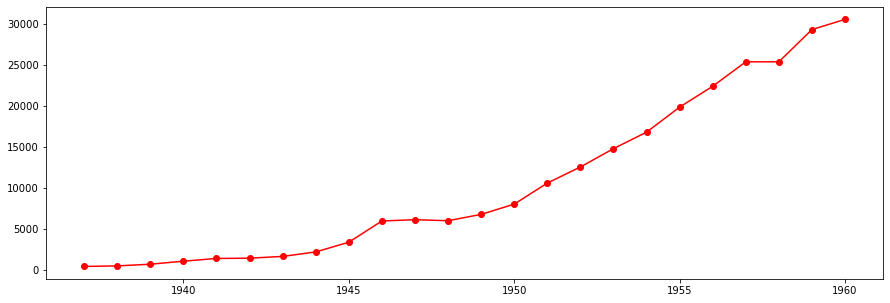

In [5]:
plt.figure(figsize=(15,5))
plt.plot( df.time, df.airmiles, 'o-', c='r');

Or with index in dataframe

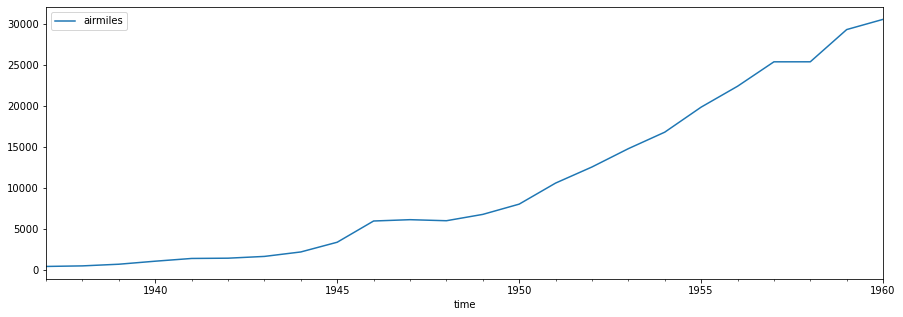

In [6]:
df_index = pd.read_csv('../data/airmiles.csv', parse_dates=['time'], index_col = 'time')
df_index.plot(figsize=(15,5));

In [7]:
df_index.head()

,airmiles
time,
1937-01-01,412
1938-01-01,480
1939-01-01,683
1940-01-01,1052
1941-01-01,1385


### Forcasting
#### with average

In [18]:
def mean_func(airmiles):
    mean_value = np.mean(airmiles)
    return [mean_value] * len(airmiles)


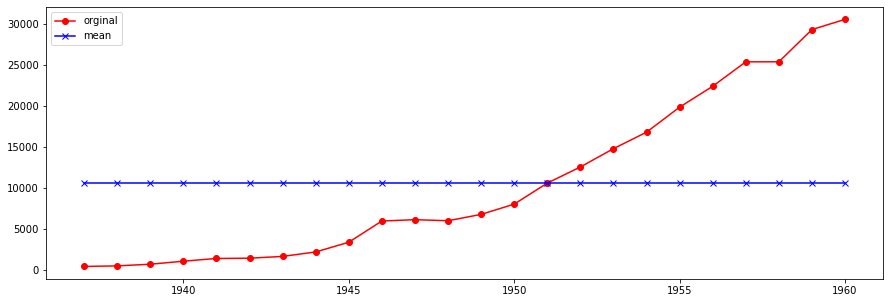

In [19]:
plt.figure(figsize=(15,5))
plt.plot( df.time, df.airmiles, 'o-', c='r', label='orginal')
plt.plot( df.time, mean_func(df.airmiles), 'x-', c='b', label='mean')

plt.legend();

#### linear  function

In [20]:
def linear_func(airmiles, k=None, b=0):
    mean_value = np.mean(airmiles)
    if k is None:
        return [mean_value] * len(airmiles)
    return [idx * k + b for idx, _ in enumerate(airmiles)]    


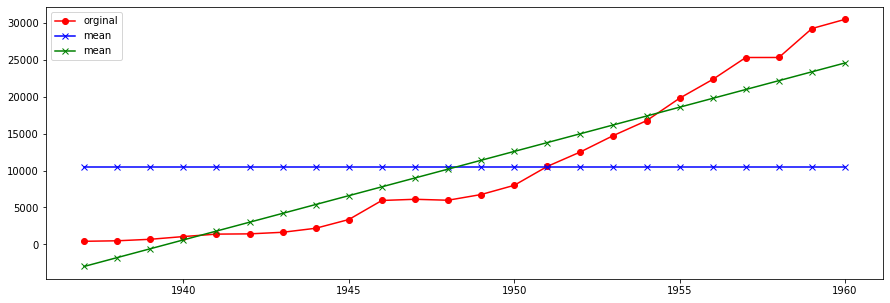

In [21]:
plt.figure(figsize=(15,5))
plt.plot( df.time, df.airmiles, 'o-', c='r', label='orginal')
plt.plot( df.time, mean_func(df.airmiles), 'x-', c='b', label='mean')
plt.plot( df.time, linear_func(df.airmiles, k=1200, b =-3000), 'x-', c='g', label='mean')

plt.legend();

### Metric

In [22]:
print('mean', mae(df.airmiles, average_func(df.airmiles)))

mean 8499.305555555557


In [17]:
print('linear', mae(df.airmiles, linear_func(df.airmiles, k=1200, b =-3000)))

linear 2811.6666666666665
